In [114]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [132]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

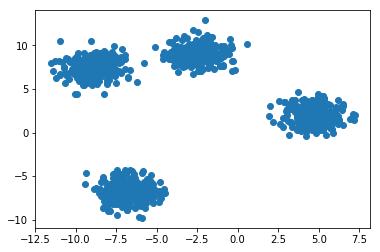

In [133]:
plt.scatter(X[:, 0], X[:, 1])

In [134]:
from sklearn.cluster import KMeans

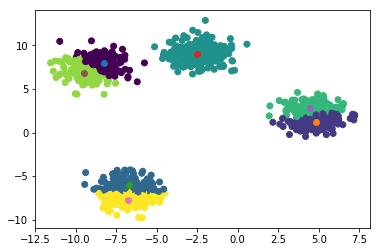

In [135]:
model = KMeans(7)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])

In [136]:
model.cluster_centers_

array([[-8.24479847,  7.94530064],
       [ 4.83577437,  1.2241624 ],
       [-6.7289187 , -6.00309149],
       [-2.50173875,  9.03287546],
       [ 4.47067342,  2.86924006],
       [-9.49332628,  6.85987367],
       [-6.76361674, -7.70566727]])

In [137]:
class CustomKMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=5):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
    def fit(self, X):
        self.X = X
        
        procs = []
        
        for proc in range(self.n_init):
            
            clusters = []
            for i in range(self.n_clusters):
                clusters.append(Cluster(random.choice(X)))

            for iter in range(self.max_iter):

                labels = []
                error = 0

                for point in X:

                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append((distance, cluster))

                    best_index = np.array(distances)[:, 0].argmin()
                    best_cluster = distances[best_index][1]

                    best_cluster.points.append(point)
                    labels.append(best_index)
                    error += distances[best_index][0]


                for cluster in clusters:
                    cluster.reset_center()


            result = {"labels":labels, "clusters":clusters, "error" : error}

            procs.append((error, result))
        
        dict_index = np.array(procs)[:, 0].argmin()
        
        dict_best = procs[dict_index][1]
        
        self.labels_ = dict_best["labels"]
        self.clusters_ = dict_best["clusters"]
        self.error_ = dict_best["error"]
        

class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def reset_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point)**2))
        
        

In [138]:
k_vals = np.linspace(1, 5, 5, dtype=int)
errors =[]

for k in k_vals:
    m2 = CustomKMeans(k)
    m2.fit(X)
    errors.append(m2.error_)

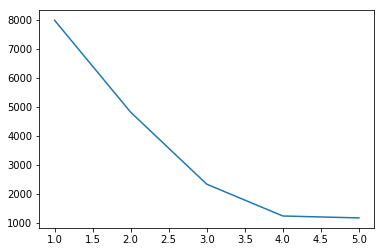

In [139]:
plt.plot(k_vals, errors)

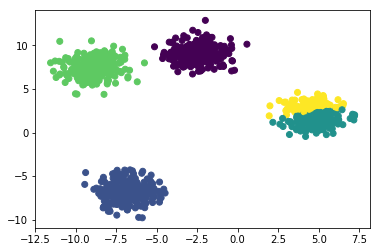

In [141]:
plt.scatter(X[:, 0], X[:, 1], c=m2.labels_)

In [124]:
! push "L 7"

[master f628f80] L 7
 1 file changed, 337 insertions(+), 335 deletions(-)
 rewrite lecture_07/K Means.ipynb (91%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 53.56 KiB | 13.39 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/coding-blocks-archives/ML-Noida-2019-Aug.git
   619b523..f628f80  master -> master


In [79]:
sorted?